In [1]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers
import random
#from google.colab import drive
#drive.mount('/drive')

2021-11-06 23:11:14.659174: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-11-06 23:11:14.659297: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


ModuleNotFoundError: No module named 'google.colab'

In [ ]:
# Add path for dataset
path = '/drive/MyDrive/DL/archive/animals/'
Items = ['dogs', 'panda', 'cats']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


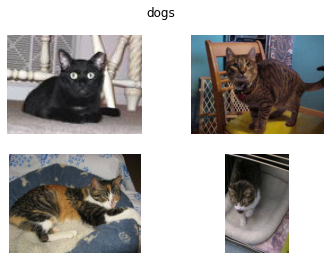

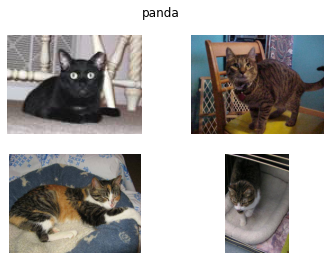

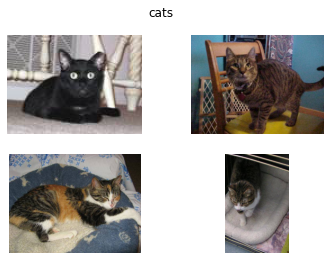

In [ ]:
# plotting 2 samples for each class
from os import listdir
for category in Items:
    fig, _ = plt.subplots(2,2)
    fig.suptitle(category)
    for item1 in listdir(path+'animals'):
      item_list=path+"animals/"+item1
      for num,category in enumerate(listdir(item_list)[:4]):
        img = plt.imread(item_list+'/'+category)
        plt.subplot(2, 2, num+1)
        plt.axis('off')
        plt.imshow(img)
    plt.show()

In [ ]:
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
data1 = []
label = []
Image_Height = 30
Image_Width = 60
j = 0
for item1 in listdir(path+'animals'):
  item_list=path+"animals/"+item1
  for num,category in enumerate(listdir(item_list)):
    img = load_img(item_list+'/'+category,target_size = (28,28,3))
    item_label = item_list+'/'+category
    print(item_label)
    data = img_to_array(img)
    samples = expand_dims(data,0)
    datagen = ImageDataGenerator(rotation_range=90,height_shift_range=0.3)
    it = datagen.flow(samples,batch_size=1)
    for i in range(2):
      plt.subplot(330 + 1 + i)
      batch = it.next()
      image = batch[0].astype('uint8')
      data1.append(image)
      label.append(j)
      plt.imshow(image)
    plt.show()
  j = j+1    

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
D = np.array(data1,dtype="float") / 255.0
Labels = np.array(label)

In [ ]:
D.shape

(6000, 28, 28, 3)

In [ ]:
Labels.shape

(6000,)

In [ ]:
print(Labels)

[0 0 0 ... 2 2 2]


In [ ]:
# split the training and testing data
(trainX, testX, trainY, testY) = train_test_split(D, Labels, test_size=0.2, random_state=42)

In [ ]:
print(testX)

[[[[0.97254902 0.97254902 0.97254902]
   [0.97254902 0.97254902 0.97254902]
   [0.98039216 0.98039216 0.98039216]
   ...
   [0.99215686 0.99215686 0.99215686]
   [0.99215686 0.99215686 0.99215686]
   [0.99607843 0.99607843 0.99607843]]

  [[0.98431373 0.98431373 0.98431373]
   [0.97254902 0.97254902 0.97254902]
   [0.97254902 0.97254902 0.97254902]
   ...
   [0.98823529 0.98823529 0.98823529]
   [0.99215686 0.99215686 0.99215686]
   [0.99607843 0.99607843 0.99607843]]

  [[0.99215686 0.99215686 0.99215686]
   [0.99607843 0.99607843 0.99607843]
   [0.98431373 0.98431373 0.98431373]
   ...
   [0.99215686 0.99215686 0.99215686]
   [0.99607843 0.99607843 0.99607843]
   [0.99607843 0.99607843 0.99607843]]

  ...

  [[0.01176471 0.01176471 0.01176471]
   [0.01176471 0.01176471 0.01176471]
   [0.00784314 0.00784314 0.00784314]
   ...
   [0.97254902 0.97254902 0.97254902]
   [0.98431373 0.98431373 0.98431373]
   [0.98431373 0.98431373 0.98431373]]

  [[0.01960784 0.01960784 0.01960784]
   [0. 

In [ ]:
len(trainY)

4800

In [ ]:
# Preprocess class labels
from keras.utils import np_utils
trainY = np_utils.to_categorical(trainY, 3)

In [ ]:
# 2.d. Print the shapes of train and test data
print(trainX.shape)
print(testX.shape)
print(trainY.shape)
print(testY.shape)

(4800, 28, 28, 3)
(1200, 28, 28, 3)
(4800, 3)
(1200,)


In [ ]:
Train1 = trainX.reshape((len(trainX),28*28,3))
Train1 = trainX.astype('float32')/255
Test1 = testX.reshape((len(testX),28*28,3))


In [ ]:
# Model Building
# 4.a. Build using Sequential Model Layers
dnnModel = models.Sequential()


In [ ]:

# Layer 1 = input layer
# specify the input size in the first layer.

dnnModel.add(layers.Dense(50, activation='relu', input_shape= (28*28,3)))
# Layer 2 = hidden layer 
dnnModel.add(layers.Dense(60, activation='relu'))

# Layer 3 = hidden layer 
dnnModel.add(layers.Dense(30, activation='relu'))
dnnModel.add(layers.Flatten())


# Layer 4 = output layer
dnnModel.add(layers.Dense(3, activation='softmax'))

dnnModel.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_104 (Dense)            (None, 784, 50)           200       
_________________________________________________________________
dense_105 (Dense)            (None, 784, 60)           3060      
_________________________________________________________________
dense_106 (Dense)            (None, 784, 30)           1830      
_________________________________________________________________
flatten_3 (Flatten)          (None, 23520)             0         
_________________________________________________________________
dense_107 (Dense)            (None, 3)                 70563     
Total params: 75,653
Trainable params: 75,653
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Configure  the model for training, by using appropriate optimizers and regularizations
# Available optimizer: adam, rmsprop, adagrad, sgd
# loss:  objective that the model will try to minimize. 
# Available loss: categorical_crossentropy, binary_crossentropy, mean_squared_error
# metrics: List of metrics to be evaluated by the model during training and testing. 
# Here we are choosing 'adam' optimizer, there are several advantages for that
# It is Quite computationally efficient
# It requires little memory space
# It is Good for non-stationary objectives
# It Works well on problems with noisy or sparse gradients
# It Works well with large data sets and large parameters
# Categorical cross entropy will be used for classification of 
        
dnnModel.compile( optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'] )


In [ ]:
# Train the model

h  = dnnModel.fit( trainX, trainY, epochs=25, batch_size=64)

Epoch 1/25
75/75 [==============================] - 1s 6ms/step - loss: 0.9743 - accuracy: 0.4858
Epoch 2/25
75/75 [==============================] - 0s 7ms/step - loss: 0.8546 - accuracy: 0.5883
Epoch 3/25
75/75 [==============================] - 0s 6ms/step - loss: 0.8211 - accuracy: 0.6127
Epoch 4/25
75/75 [==============================] - 0s 6ms/step - loss: 0.8017 - accuracy: 0.6281
Epoch 5/25
75/75 [==============================] - 0s 6ms/step - loss: 0.7787 - accuracy: 0.6385
Epoch 6/25
75/75 [==============================] - 0s 6ms/step - loss: 0.7614 - accuracy: 0.6490
Epoch 7/25
75/75 [==============================] - 0s 6ms/step - loss: 0.7423 - accuracy: 0.6637
Epoch 8/25
75/75 [==============================] - 0s 6ms/step - loss: 0.7263 - accuracy: 0.6725
Epoch 9/25
75/75 [==============================] - 0s 6ms/step - loss: 0.7008 - accuracy: 0.6902
Epoch 10/25
75/75 [==============================] - 0s 6ms/step - loss: 0.6886 - accuracy: 0.7029
Epoch 11/25
75/75 [

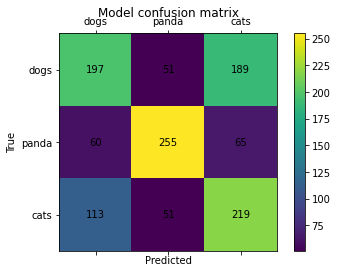

Accuracy : 55.92%


In [ ]:
from numpy import argmax
from sklearn.metrics import confusion_matrix, accuracy_score

pred = dnnModel.predict(testX)
predictions = argmax(pred, axis=1) # return to label

cm = confusion_matrix(testY, predictions)

fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Model confusion matrix')
fig.colorbar(cax)
ax.set_xticklabels([''] + Items)
ax.set_yticklabels([''] + Items)

for i in range(3):
    for j in range(3):
        ax.text(i, j, cm[j, i], va='center', ha='center')

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


accuracy = accuracy_score(testY, predictions)
print("Accuracy : %.2f%%" % (accuracy*100.0))

In [ ]:
# Additional models
# Dropout
# Model Building
# 4.a. Build using Sequential Model Layers
dnnModel = models.Sequential()

In [ ]:

# Layer 1 = input layer
# specify the input size in the first layer.

dnnModel.add(layers.Dense(50, activation='relu', input_shape= (28*28,3)))
# Layer 2 = hidden layer 
dnnModel.add(layers.Dense(60, activation='relu'))
# Add dropout of 50% to layer 2
dnnModel.add(layers.Dropout(0.5))

# Layer 3 = hidden layer 
dnnModel.add(layers.Dense(30, activation='relu'))
# Add dropout of 50% to layer 2
dnnModel.add(layers.Dropout(0.5))
dnnModel.add(layers.Flatten())



# Layer 4 = output layer
dnnModel.add(layers.Dense(3, activation='softmax'))

dnnModel.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_108 (Dense)            (None, 784, 50)           200       
_________________________________________________________________
dense_109 (Dense)            (None, 784, 60)           3060      
_________________________________________________________________
dropout_2 (Dropout)          (None, 784, 60)           0         
_________________________________________________________________
dense_110 (Dense)            (None, 784, 30)           1830      
_________________________________________________________________
dropout_3 (Dropout)          (None, 784, 30)           0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 23520)             0         
_________________________________________________________________
dense_111 (Dense)            (None, 3)               

In [ ]:
# Configure  the model for training, by using appropriate optimizers and regularizations
# Available optimizer: adam, rmsprop, adagrad, sgd
# loss:  objective that the model will try to minimize. 
# Available loss: categorical_crossentropy, binary_crossentropy, mean_squared_error
# metrics: List of metrics to be evaluated by the model during training and testing. 
        
dnnModel.compile( optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'] )

In [ ]:
# Train the model

h  = dnnModel.fit( trainX, trainY, epochs=25, batch_size=64)

Epoch 1/25
75/75 [==============================] - 1s 7ms/step - loss: 1.0172 - accuracy: 0.4465
Epoch 2/25
75/75 [==============================] - 1s 7ms/step - loss: 0.8924 - accuracy: 0.5446
Epoch 3/25
75/75 [==============================] - 1s 7ms/step - loss: 0.8417 - accuracy: 0.5965
Epoch 4/25
75/75 [==============================] - 1s 7ms/step - loss: 0.8123 - accuracy: 0.6044
Epoch 5/25
75/75 [==============================] - 1s 7ms/step - loss: 0.8079 - accuracy: 0.6073
Epoch 6/25
75/75 [==============================] - 1s 7ms/step - loss: 0.7877 - accuracy: 0.6275
Epoch 7/25
75/75 [==============================] - 1s 7ms/step - loss: 0.7821 - accuracy: 0.6356
Epoch 8/25
75/75 [==============================] - 1s 7ms/step - loss: 0.7587 - accuracy: 0.6521
Epoch 9/25
75/75 [==============================] - 1s 7ms/step - loss: 0.7614 - accuracy: 0.6490
Epoch 10/25
75/75 [==============================] - 1s 7ms/step - loss: 0.7449 - accuracy: 0.6567
Epoch 11/25
75/75 [

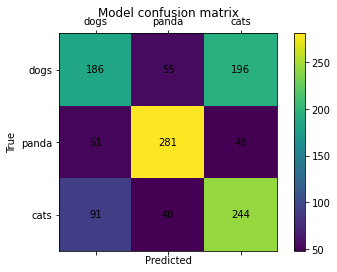

Accuracy : 59.25%


In [ ]:
from numpy import argmax
from sklearn.metrics import confusion_matrix, accuracy_score

pred = dnnModel.predict(testX)
predictions = argmax(pred, axis=1) # return to label

cm = confusion_matrix(testY, predictions)

fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Model confusion matrix')
fig.colorbar(cax)
ax.set_xticklabels([''] + Items)
ax.set_yticklabels([''] + Items)

for i in range(3):
    for j in range(3):
        ax.text(i, j, cm[j, i], va='center', ha='center')

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


accuracy = accuracy_score(testY, predictions)
print("Accuracy : %.2f%%" % (accuracy*100.0))

In [ ]:
#### regularization
# Model Building
# 4.a. Build using Sequential Model Layers
dnnModel = models.Sequential()


In [ ]:
from tensorflow.keras import regularizers
# Layer 1 = input layer
# specify the input size in the first layer.

dnnModel.add(layers.Dense(50, activation='relu', input_shape= (28*28,3)))
# Layer 2 = hidden layer 
# Layer 2 = hidden layer  with Regularizers
dnnModel.add(layers.Dense(60, activation='relu', kernel_regularizer=regularizers.l2(0.01),
                activity_regularizer=regularizers.l2(0.01)) )

# Layer 3 = hidden layer 
dnnModel.add(layers.Dense(30, activation='relu'))
dnnModel.add(layers.Flatten())


# Layer 4 = output layer
dnnModel.add(layers.Dense(3, activation='softmax'))

dnnModel.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_112 (Dense)            (None, 784, 50)           200       
_________________________________________________________________
dense_113 (Dense)            (None, 784, 60)           3060      
_________________________________________________________________
dense_114 (Dense)            (None, 784, 30)           1830      
_________________________________________________________________
flatten_5 (Flatten)          (None, 23520)             0         
_________________________________________________________________
dense_115 (Dense)            (None, 3)                 70563     
Total params: 75,653
Trainable params: 75,653
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Configure  the model for training, by using appropriate optimizers and regularizations
# Available optimizer: adam, rmsprop, adagrad, sgd
# loss:  objective that the model will try to minimize. 
# Available loss: categorical_crossentropy, binary_crossentropy, mean_squared_error
# metrics: List of metrics to be evaluated by the model during training and testing. 
        
dnnModel.compile( optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'] )

In [ ]:
# Train the model

h  = dnnModel.fit( trainX, trainY, epochs=25, batch_size=64)

Epoch 1/25
75/75 [==============================] - 1s 7ms/step - loss: 1.8271 - accuracy: 0.4854
Epoch 2/25
75/75 [==============================] - 0s 6ms/step - loss: 1.1390 - accuracy: 0.5515
Epoch 3/25
75/75 [==============================] - 1s 7ms/step - loss: 1.0626 - accuracy: 0.5681
Epoch 4/25
75/75 [==============================] - 0s 6ms/step - loss: 0.9963 - accuracy: 0.5910
Epoch 5/25
75/75 [==============================] - 0s 6ms/step - loss: 0.9551 - accuracy: 0.6069
Epoch 6/25
75/75 [==============================] - 1s 7ms/step - loss: 0.9320 - accuracy: 0.6129
Epoch 7/25
75/75 [==============================] - 0s 6ms/step - loss: 0.9018 - accuracy: 0.6215
Epoch 8/25
75/75 [==============================] - 0s 7ms/step - loss: 0.8863 - accuracy: 0.6383
Epoch 9/25
75/75 [==============================] - 0s 6ms/step - loss: 0.8698 - accuracy: 0.6365
Epoch 10/25
75/75 [==============================] - 1s 7ms/step - loss: 0.8546 - accuracy: 0.6510
Epoch 11/25
75/75 [

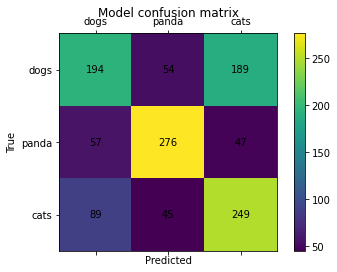

Accuracy : 59.92%


In [ ]:
from numpy import argmax
from sklearn.metrics import confusion_matrix, accuracy_score

pred = dnnModel.predict(testX)
predictions = argmax(pred, axis=1) # return to label

cm = confusion_matrix(testY, predictions)

fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Model confusion matrix')
fig.colorbar(cax)
ax.set_xticklabels([''] + Items)
ax.set_yticklabels([''] + Items)

for i in range(3):
    for j in range(3):
        ax.text(i, j, cm[j, i], va='center', ha='center')

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


accuracy = accuracy_score(testY, predictions)
print("Accuracy : %.2f%%" % (accuracy*100.0))